# Proyecto 2
## Problema Minimum Coin Change

**Importar librerias**

In [103]:
import io
import sys
import cProfile
import pstats
import matplotlib.pyplot as plt

## Implementación del algoritmo con Dynamic Programming
El resultado del algoritmo es una matriz donde el eje vertical (eje y) representa las denominaciones de las monedas, ordenadas de menor a mayor. El valor en una casilla con coordenadas (x, y) representa el número mínimo de monedas necesarias para formar el valor x utilizando todas las monedas con denominaciones menores o iguales a y. Por lo tanto, el resultado final del algoritmo es el número ubicado en la esquina inferior derecha de la matriz. Este número indica el mínimo número de monedas necesarias para formar el valor deseado con las monedas disponibles.

In [104]:
def init_table(coins: [int], amount: int):
    table = [[0]*(amount+1) for _ in range(len(coins))]

    for i in range(len(table[0])):
        table[0][i] = i

    return table

# the amounts MUST include a 1 cent coin
# the coins list MUST be sorted
def coin_change(coins: [int], amount: int):    
    table = init_table(coins, amount)

    for row in range(1, len(coins)):
        for col in range(amount+1):
            if col < coins[row]:
                table[row][col] = table[row-1][col]
            else:
                table[row][col] = min(table[row-1][col], 1 + table[row][col-coins[row]])

    return table


def print_result(coins: [int], amount: int):
    table = coin_change(coins, amount)

    print("x", end="  ")
    for i in range(amount+1):
        print(i, end="  ")
    print()

    for i in range(len(table)):
        print(coins[i], end=" ")
        print(table[i])

coins = [1,3,4,5]
amount = 7
table = print_result(coins, amount)


x  0  1  2  3  4  5  6  7  
1 [0, 1, 2, 3, 4, 5, 6, 7]
3 [0, 1, 2, 1, 2, 3, 2, 3]
4 [0, 1, 2, 1, 1, 2, 2, 2]
5 [0, 1, 2, 1, 1, 1, 2, 2]


## Implementacion con Divide y Conquista

In [105]:
def minCoinChangeDAC(coin, K):
    m = len(coin)
    # Caso base: Cuando el total K es 0, se necesitan 0 monedas
    if K == 0:
        return 0

    # Inicializar minCount con un valor muy grande
    minCount = sys.maxsize

    # Probar cada moneda que tiene un valor menor o igual a K
    for i in range(m):
        if coin[i] <= K:
            # Encontrar de forma recursiva el número de monedas necesarias para el monto restante
            currCount = minCoinChangeDAC(coin, K - coin[i])

            # Si el número de monedas necesarias para el monto restante no es infinito,
            # y es menor que el minCount actual, actualizar minCount
            if currCount != sys.maxsize and currCount + 1 < minCount:
                minCount = currCount + 1

    # Si minCount no ha sido actualizado, devolver -1 para indicar fallo
    if minCount == sys.maxsize:
        return -1
    else:
        return minCount

In [106]:
# Probando la funcion

# Listado de monedas disponibles
coins = [1, 3, 4, 5]

# Cantidad total
K = 7

# Imprimir el resultado
print(minCoinChangeDAC(coins, K))

2


**Referencias:**
- https://www.enjoyalgorithms.com/blog/minimum-coin-change
- https://www.boardinfinity.com/blog/coin-change-problem-with-dp-and-recursion-approach/

## Analisis Empirico

**Profiler de funciones**

In [107]:
def profile_function(func, coins, K_values):
    times = []
    results = []
    
    for K in K_values:
        profiler = cProfile.Profile()
        profiler.enable()
        
        # Run the function with the current K value
        result = func(coins, K)
        results.append(result)
        
        # Disable the profiler and collect stats
        profiler.disable()
        s = io.StringIO()
        ps = pstats.Stats(profiler, stream=s).sort_stats('time')
        ps.print_stats()
        
        # Record the total time
        times.append(ps.total_tt)

    # Return the list of results and times (in milliseconds)
    return results, [time * 1000 for time in times]

### Analisis de implementacion con Divide y Conquista

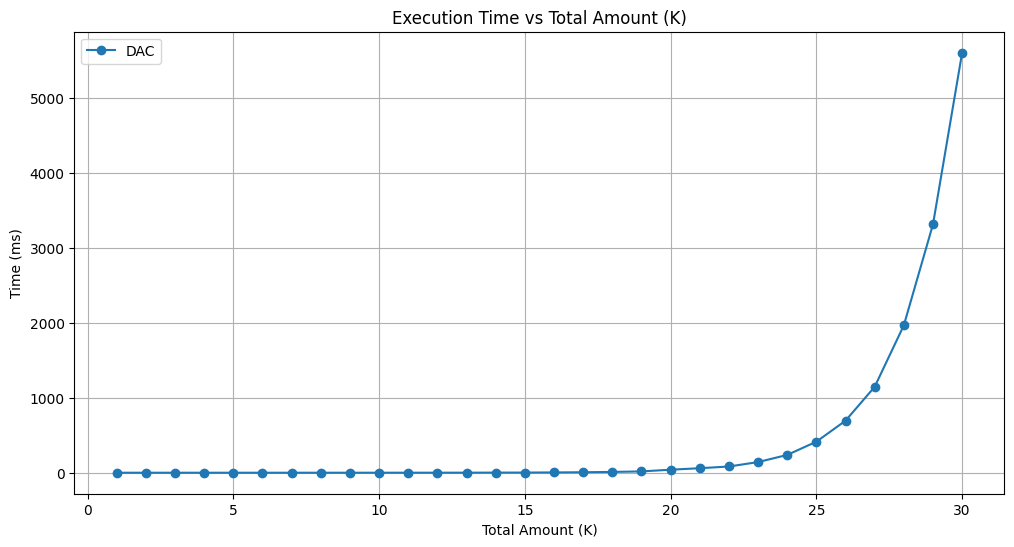

In [108]:
# Define a list of K values to test
K_values = list(range(1, 31))  # K from 1 to 30

# List of coin denominations
coins = [1, 3, 4, 5]

# Profile the recursive approach
results_recursive, times_recursive = profile_function(minCoinChangeDAC, coins, K_values)

# Now, plot the results
plt.figure(figsize=(12, 6))
plt.plot(K_values, times_recursive, label='DAC', marker='o')
plt.xlabel('Total Amount (K)')
plt.ylabel('Time (ms)')
plt.title('Execution Time vs Total Amount (K)')
plt.legend()
plt.grid(True)
plt.show()


### Analisis de implementacion con Programacion Dinamica

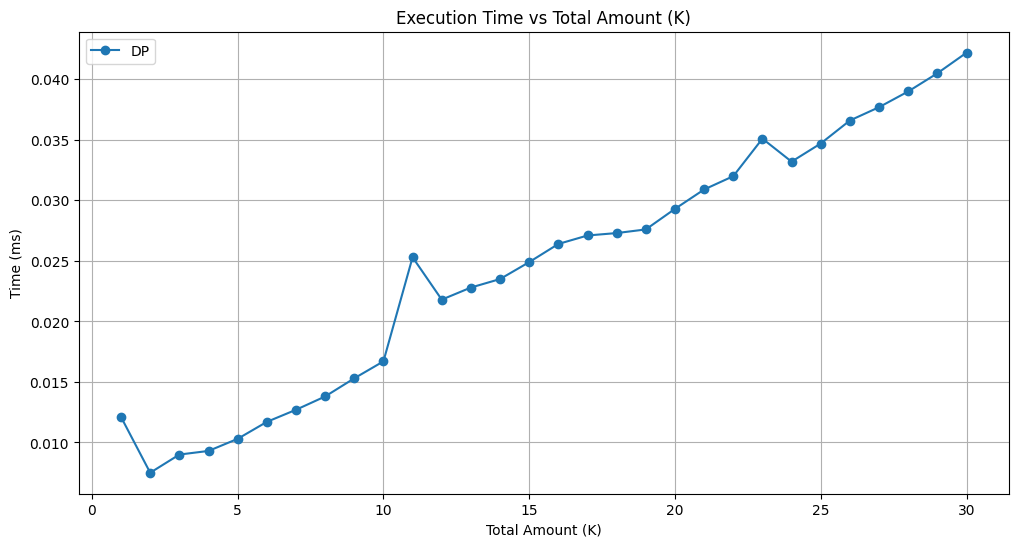

In [109]:
# Define a list of K values to test
K_values = list(range(1, 31))  # K from 1 to 30

# List of coin denominations
coins = [1, 3, 4, 5]
m = len(coins)

# Profile the recursive approach
results_recursive, times_recursive = profile_function(coin_change, coins, K_values)

# Now, plot the results
plt.figure(figsize=(12, 6))
plt.plot(K_values, times_recursive, label='DP', marker='o')
plt.xlabel('Total Amount (K)')
plt.ylabel('Time (ms)')
plt.title('Execution Time vs Total Amount (K)')
plt.legend()
plt.grid(True)
plt.show()